In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df=pd.read_csv('TM WY 2023 SWE.csv')
print(df)

    Site Id       Date   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   \
0       830  10/1/2022    NaN             0.0             0.0   
1       830  10/2/2022    NaN             0.0             0.0   
2       830  10/3/2022    NaN             0.0             0.0   
3       830  10/4/2022    NaN             0.0             0.0   
4       830  10/5/2022    NaN             0.0             0.0   
..      ...        ...    ...             ...             ...   
365     830  9/30/2023  23:59           -99.9            57.2   
366     NaN        NaN    NaN             NaN             NaN   
367     NaN        NaN    NaN             NaN             NaN   
368     NaN        NaN    NaN             NaN             NaN   
369                NaN    NaN             NaN             NaN   

     TOBS.I-1 (degC)   TMAX.D-1 (degC)   TMIN.D-1 (degC)   TAVG.D-1 (degC)   \
0                -2.1               9.1              -2.2               2.6   
1                -0.9               9.9              -3.0    

In [3]:
df=df.iloc[:-5]  # remove last row which is a summary row
df.columns=df.columns.str.strip() # remove any leading/trailing whitespace
df=df.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_swe=df[['Date','SWE','TAVG']].copy()
df_swe['Date']=pd.to_datetime(df_swe['Date'], format='%m/%d/%Y')
print(df_swe)

          Date  SWE  TAVG
0   2022-10-01  0.0   2.6
1   2022-10-02  0.0   2.8
2   2022-10-03  0.0   3.7
3   2022-10-04  0.0   5.6
4   2022-10-05  0.0   6.7
..         ...  ...   ...
360 2023-09-26  0.0  11.1
361 2023-09-27  0.0   7.9
362 2023-09-28  0.0   4.7
363 2023-09-29  0.0   6.1
364 2023-09-30  0.0   5.7

[365 rows x 3 columns]


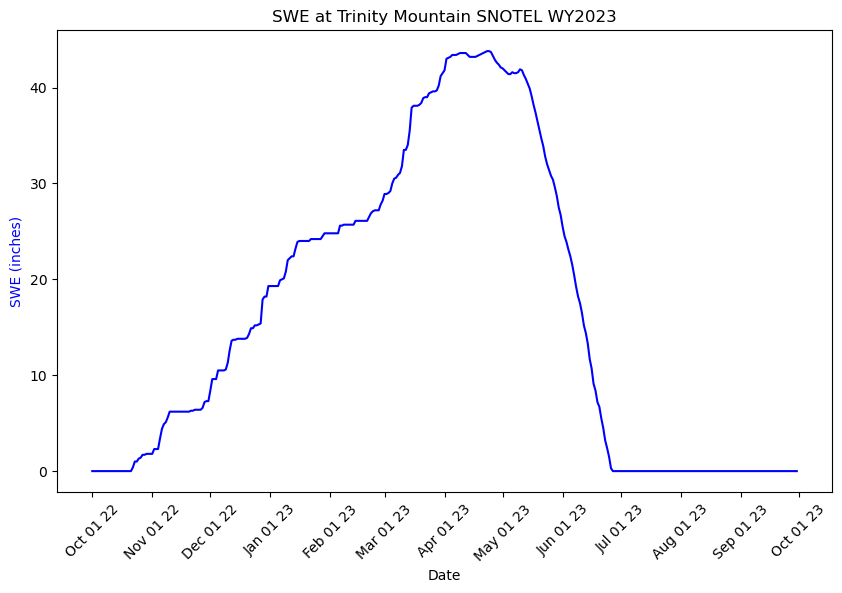

In [4]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='SWE (inches)')
ax1.set_xlabel('Date')
ax1.set_ylabel('SWE (inches)', color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('SWE at Trinity Mountain SNOTEL WY2023')
plt.show()

In [5]:
SWE_max=df_swe['SWE'].max()
Date_SWE_max=df_swe.loc[df_swe['SWE'].idxmax(),'Date']
SWE_end=df_swe[(df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end=df_swe.loc[(df_swe['Date']>Date_SWE_max) & (df_swe['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE: {SWE_max} inches on {Date_SWE_max.date()}') #adding the .date() takes away the time component of the date!
print(f'SWE meltout complete by {Date_SWE_end.date()}')

Max SWE: 43.8 inches on 2023-04-23
SWE meltout complete by 2023-06-27


In [6]:
#Now I need to find the DDF by isolating only days when TAVG>0 and after date of max SWE
mask=(df_swe['TAVG']>0) & (df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)
df_melt=df_swe.loc[mask,['Date','SWE','TAVG']].copy()
print(df_melt)

del_SWE=SWE_max - SWE_end
sum_TAVG=df_melt['TAVG'].sum()
DDF=del_SWE/sum_TAVG
print(f'Degree Day Factor (DDF) for Trinity Mountain WY2023 melt season: {DDF} inches/°C/day')

          Date   SWE  TAVG
208 2023-04-27  42.9   3.4
209 2023-04-28  42.6   4.7
210 2023-04-29  42.4   4.1
211 2023-04-30  42.1   8.4
212 2023-05-01  42.0   9.8
213 2023-05-02  41.8  12.2
214 2023-05-03  41.6   9.2
215 2023-05-04  41.4   8.2
216 2023-05-05  41.4   3.6
217 2023-05-06  41.6   0.4
218 2023-05-07  41.5   1.5
220 2023-05-09  41.6   0.2
222 2023-05-11  41.8   1.4
223 2023-05-12  41.3   3.8
224 2023-05-13  40.9   5.7
225 2023-05-14  40.4   5.8
226 2023-05-15  39.9   6.6
227 2023-05-16  39.1   6.7
228 2023-05-17  38.2   7.9
229 2023-05-18  37.4   7.0
230 2023-05-19  36.5   7.9
231 2023-05-20  35.6   9.1
232 2023-05-21  34.7   9.7
233 2023-05-22  33.9   9.9
234 2023-05-23  32.8   6.5
235 2023-05-24  32.0   5.6
236 2023-05-25  31.4   4.8
237 2023-05-26  30.8   4.7
238 2023-05-27  30.4   4.6
239 2023-05-28  29.6   5.4
240 2023-05-29  28.7   5.7
241 2023-05-30  27.5   7.0
242 2023-05-31  26.7   5.9
243 2023-06-01  25.5   7.2
244 2023-06-02  24.5   6.5
245 2023-06-03  23.9   5.7
2

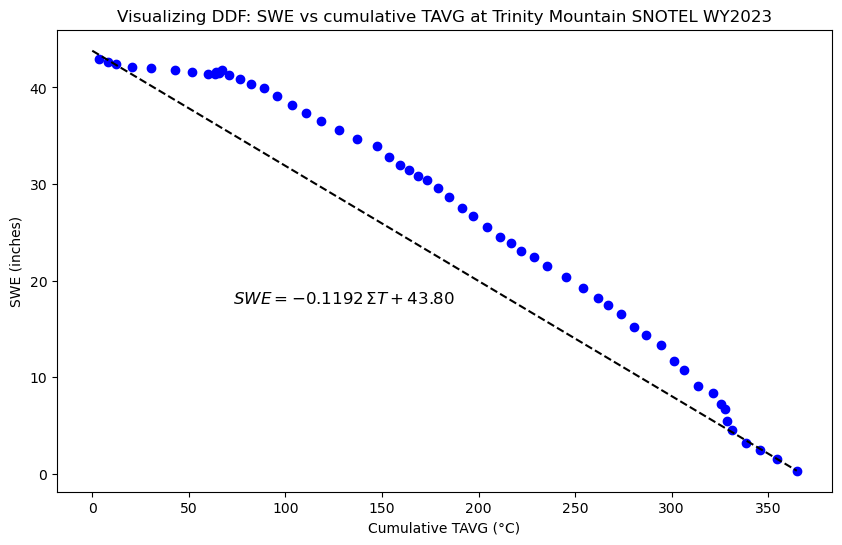

In [17]:
# Create a visual diagram for DDF calculation

df_melt['Sum_TAVG']=df_melt['TAVG'].cumsum()

x_secant=[0,sum_TAVG]
y_secant=[SWE_max,SWE_end]
m=(SWE_end - SWE_max)/(sum_TAVG - 0)
b=SWE_max
secant_line=rf'$SWE = {m:.4f} \,\Sigma T + {b:.2f}$'

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.scatter(df_melt['Sum_TAVG'],df_melt['SWE'], color='blue', label='SWE (inches)')
ax2.plot(x_secant, y_secant, color='k', linestyle='--', label='Secant Line')
ax2.set_xlabel('Cumulative TAVG (°C)')
ax2.set_ylabel('SWE (inches)')
ax2.set_title('Visualizing DDF: SWE vs cumulative TAVG at Trinity Mountain SNOTEL WY2023')
plt.text(0.2*sum_TAVG, 0.4*(SWE_max+SWE_end), secant_line, fontsize=12, color='k')
plt.show()

In [ ]:
#Now let's see how accurately the DDF predicts the daily melt

#Here just setting up a new dataframe for the model results (under column "Melt Predicted")

df_model=df_swe[(df_swe['Date']>=Date_SWE_max)].copy()
df_model=df_model.reset_index(drop=True)
df_model['Melt Predicted']=0.0
df_model['SWE Predicted']=0.0
df_model.loc[0,'SWE Predicted']=SWE_max

print(df_model)

In [ ]:
#Now let's refill the "Melt Predicted" column using the DDF and TAVG values

for i in range(len(df_model)-1):
    if df_model.loc[i,'TAVG']>0:
        df_model.loc[i,'Melt Predicted']=DDF * df_model.loc[i,'TAVG']
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE Predicted'] - (DDF* df_model.loc[i,'TAVG'])
    elif df_model.loc[i,'TAVG']<=0:
        df_model.loc[i,'Melt Predicted']=0.0
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE Predicted']

df_model.loc[df_model['SWE Predicted']<0,'SWE Predicted']=0.0 #The for loop will produce negative SWE values after all snow is gone, so I'm resetting those to zero here.
print(df_model)

In [ ]:
Date_SWE_model_end=df_model.loc[df_model['SWE Predicted']==0.0, 'Date'].iloc[0]
print(f'SWE meltout complete by {Date_SWE_model_end.date()}')

In [ ]:
#Plot our model versus observed melt at Trinity Mountain WY2023. These should nearly be identical, since the model is from the observations.

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='Observed SWE (inches)')
ax2.plot(df_model['Date'],df_model['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax2.set_xlabel('Date')
ax2.set_ylabel('SWE (inches)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2023 with DDF')
ax2.legend()
plt.show()

In [ ]:
#Finding RMSE with my DDF model

melt_mod=df_model.loc[(df_model['Date']>Date_SWE_max) & (df_model['Date']<Date_SWE_model_end)]

rmse=np.sqrt(np.mean((melt_mod['SWE Predicted']-melt_mod['SWE'])**2))
print(f'RMSE of DDF model for Trinity Mountain WY2023 melt season: {rmse} inches')

In [ ]:
#Let's try another year with the same DDF!

df_2019=pd.read_csv('TM WY 2019 SWE.csv')
print(df_2019)

In [ ]:
#Remove extra spaces, rename columns, truncate df, delete NaN rows
df_2019=df_2019.iloc[:-5]  # remove last row which is a summary row
df_2019.columns=df_2019.columns.str.strip() # remove any leading/trailing whitespace
df_2019=df_2019.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2019_SWE=df_2019[['Date','SWE','TAVG']].copy()
df_2019_SWE['Date']=pd.to_datetime(df_2019_SWE['Date'], format='%m/%d/%Y')
print(df_2019_SWE)

In [ ]:
#Find max SWE and date of max SWE for 2019 data
SWE_max_2019=df_2019_SWE['SWE'].max()
Date_SWE_max_2019=df_2019_SWE.loc[df_2019_SWE['SWE'].idxmax(),'Date']
SWE_end_2019=df_2019_SWE[(df_2019_SWE['Date']>Date_SWE_max_2019) & (df_2019_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2019=df_2019_SWE.loc[(df_2019_SWE['Date']>Date_SWE_max_2019) & (df_2019_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2019: {SWE_max_2019} inches on {Date_SWE_max_2019.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2019.date()}')

In [ ]:
#Making a copy DF for the 2019 model
df_model_2019=df_2019_SWE[(df_2019_SWE['Date']>=Date_SWE_max_2019)].copy()
df_model_2019=df_model_2019.reset_index(drop=True)
df_model_2019['Melt Predicted']=0.0
df_model_2019['SWE Predicted']=0.0

df_model_2019.loc[0,'SWE Predicted']=SWE_max_2019
print(df_model_2019)

In [ ]:
#Now I'm going to use the DDF from 2023 to model the melt in 2019

for i in range(len(df_model_2019)-1):
    if df_model_2019.loc[i,'TAVG']>0 and df_model_2019.loc[i,'SWE Predicted']>0.0:
        df_model_2019.loc[i,'Melt Predicted']=DDF * df_model_2019.loc[i,'TAVG']
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE Predicted'] - (DDF* df_model_2019.loc[i,'TAVG'])
    elif df_model_2019.loc[i,'TAVG']<=0 and df_model_2019.loc[i,'SWE Predicted']>0.0:
        df_model_2019.loc[i,'Melt Predicted']=0.0
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE Predicted']
df_model_2019.loc[df_model_2019['SWE Predicted']<0,'SWE Predicted']=0.0

Date_SWE_model_end_2019=df_model_2019.loc[df_model_2019['SWE Predicted']==0.0, 'Date'].iloc[0]

print(df_model_2019)

print(f'SWE meltout complete by {Date_SWE_model_end_2019.date()}')

In [ ]:
#rmse for 2019 model vs observed
                           
melt_mod_2019=df_model_2019.loc[(df_model_2019['Date']>Date_SWE_max_2019) & (df_model_2019['Date']<Date_SWE_model_end_2019)]

rmse_2019=np.sqrt(np.mean((melt_mod_2019['SWE Predicted']-melt_mod_2019['SWE'])**2))
print(f'RMSE of DDF model for Trinity Mountain WY2019 melt season: {rmse_2019} inches')

In [ ]:
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(df_2019_SWE['Date'],df_2019_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax3.plot(df_model_2019['Date'],df_model_2019['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax3.set_xlabel('Date')
ax3.set_ylabel('SWE (inches)')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2019')
ax3.legend()
plt.show()

In [ ]:
#The model is pretty successful for WY2019, too. The predicted meltout date is 6/19/2019 whereas actual meltout was 6/28/2019.Perhaps because this year is so similar in max SWE amount and timing? I want to try a year with much lower snowpack and see what happens.

df_2015=pd.read_csv('TM WY 2015 SWE.csv')
print(df_2015)

In [ ]:
df_2015=df_2015.iloc[:-5]  # remove last row which is a summary row
df_2015.columns=df_2015.columns.str.strip() # remove any leading/trailing
df_2015=df_2015.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2015_SWE=df_2015[['Date','SWE','TAVG']].copy()
df_2015_SWE['Date']=pd.to_datetime(df_2015_SWE['Date'], format='%m/%d/%Y')
print(df_2015_SWE)

In [ ]:
SWE_max_2015=df_2015_SWE['SWE'].max()
Date_SWE_max_2015=df_2015_SWE.loc[df_2015_SWE['SWE'].idxmax(),'Date']
SWE_end_2015=df_2015_SWE[(df_2015_SWE['Date']>Date_SWE_max_2015) & (df_2015_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2015=df_2015_SWE.loc[(df_2015_SWE['Date']>Date_SWE_max_2015) & (df_2015_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2015: {SWE_max_2015} inches on {Date_SWE_max_2015.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2015.date()}')

In [ ]:
df_model_2015=df_2015_SWE[(df_2015_SWE['Date']>=Date_SWE_max_2015)].copy()
df_model_2015=df_model_2015.reset_index(drop=True)
df_model_2015['Melt Predicted']=0.0
df_model_2015['SWE Predicted']=0.0
df_model_2015.loc[0,'SWE Predicted']=SWE_max_2015
print(df_model_2015)

In [ ]:
for i in range(len(df_model_2015)-1):
    if df_model_2015.loc[i,'TAVG']>0:
        df_model_2015.loc[i,'Melt Predicted']=DDF* df_model_2015.loc[i,'TAVG']
        df_model_2015.loc[i+1,'SWE Predicted']=df_model_2015.loc[i,'SWE Predicted'] - (DDF* df_model_2015.loc[i,'TAVG'])
    elif df_model_2015.loc[i,'TAVG']<=0:
        df_model_2015.loc[i,'Melt Predicted']=0.0
        df_model_2015.loc[i+1,'SWE Predicted']=df_model_2015.loc[i,'SWE Predicted']

df_model_2015.loc[df_model_2015['SWE Predicted']<0,'SWE Predicted']=0.0

Date_SWE_model_end_2015=df_model_2015.loc[df_model_2015['SWE Predicted']==0.0, 'Date'].iloc[0]

print(df_model_2015)

print(f'SWE meltout complete by {Date_SWE_model_end_2015.date()}')

In [ ]:
#RMSE for 2015 model vs observed

melt_mod_2015=df_model_2015.loc[(df_model_2015['Date']>Date_SWE_max_2015) & (df_model_2015['Date']<Date_SWE_model_end_2015)]
rmse_2015=np.sqrt(np.mean((melt_mod_2015['SWE Predicted']-melt_mod_2015['SWE'])**2))
print(f'RMSE of DDF model for Trinity Mountain WY2015 melt season: {rmse_2015} inches')

In [ ]:
fig4, ax4 = plt.subplots(figsize=(10,6))
ax4.plot(df_2015_SWE['Date'],df_2015_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax4.plot(df_model_2015['Date'],df_model_2015['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax4.set_xlabel('Date')
ax4.set_ylabel('SWE (inches)')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.tick_params(axis='x', rotation=45)
ax4.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2015 with DDF')
ax4.legend()
plt.show()

In [ ]:
#I'm going to try 2017 SNOWMAGEDON next!

df_2017=pd.read_csv('TM WY 2017 SWE.csv')
df_2017=df_2017.iloc[:-5]  # remove last row which is a summary row
df_2017.columns=df_2017.columns.str.strip() # remove any leading/trailing whitespace
df_2017=df_2017.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2017_SWE=df_2017[['Date','SWE','TAVG']].copy()
df_2017_SWE['Date']=pd.to_datetime(df_2017_SWE['Date'], format='%m/%d/%Y')
print(df_2017_SWE)

In [ ]:
SWE_max_2017=df_2017_SWE['SWE'].max()
Date_SWE_max_2017=df_2017_SWE.loc[df_2017_SWE['SWE'].idxmax(),'Date']
SWE_end_2017=df_2017_SWE[(df_2017_SWE['Date']>Date_SWE_max_2017) & (df_2017_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2017=df_2017_SWE.loc[(df_2017_SWE['Date']>Date_SWE_max_2017) & (df_2017_SWE['SWE']==0.0),'Date'].iloc[0]
print(f'Max SWE 2017: {SWE_max_2017} inches on {Date_SWE_max_2017.date()}')
print(f'SWE meltout complete by {Date_SWE_end_2017.date()}')

In [ ]:
df_model_2017=df_2017_SWE[(df_2017_SWE['Date']>=Date_SWE_max_2017)].copy()
df_model_2017=df_model_2017.reset_index(drop=True)
df_model_2017['Melt Predicted']=0.0
df_model_2017['SWE Predicted']=0.0
df_model_2017.loc[0,'SWE Predicted']=SWE_max_2017
print(df_model_2017)

In [ ]:
for i in range(len(df_model_2017)-1):
    if df_model_2017.loc[i,'TAVG']>0:
        df_model_2017.loc[i,'Melt Predicted']=DDF* df_model_2017.loc[i,'TAVG']
        df_model_2017.loc[i+1,'SWE Predicted']=df_model_2017.loc[i,'SWE Predicted'] - (DDF* df_model_2017.loc[i,'TAVG'])
    elif df_model_2017.loc[i,'TAVG']<=0:
        df_model_2017.loc[i,'Melt Predicted']=0.0
        df_model_2017.loc[i+1,'SWE Predicted']=df_model_2017.loc[i,'SWE Predicted']

df_model_2017.loc[df_model_2017['SWE Predicted']<0,'SWE Predicted']=0.0
Date_SWE_model_end_2017=df_model_2017.loc[df_model_2017['SWE Predicted']==0.0, 'Date'].iloc[0]
print(df_model_2017)
print(f'SWE meltout complete by {Date_SWE_model_end_2017.date()}')

In [ ]:
#RMSE for 2017 model vs observed

melt_mod_2017=df_model_2017.loc[(df_model_2017['Date']>Date_SWE_max_2017) & (df_model_2017['Date']<Date_SWE_model_end_2017)]
rmse_2017=np.sqrt(np.mean((melt_mod_2017['SWE Predicted']-melt_mod_2017['SWE'])**2))
print(f'RMSE of DDF model for Trinity Mountain WY2017 melt season: {rmse_2017} inches')

In [ ]:
fig5, ax5 = plt.subplots(figsize=(10,6))
ax5.plot(df_2017_SWE['Date'],df_2017_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax5.plot(df_model_2017['Date'],df_model_2017['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax5.set_xlabel('Date')
ax5.set_ylabel('SWE (inches)')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax5.xaxis.set_major_locator(mdates.MonthLocator())
ax5.tick_params(axis='x', rotation=45)
ax5.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2017 with DDF')
ax5.legend()
plt.show()

In [ ]:
#Enough DDF. I want to try melt factor now.
#Define melt factor (MF) in inches/°C/day from WY2023.

df_melt['Melt']=0.0
df_melt=df_melt.reset_index(drop=True)

df_melt['Melt']=df_melt['SWE'].shift(1) - df_melt['SWE']
print(df_melt)

In [ ]:
df_melt.loc[0,'Melt']=0.0 # first day has no prior day to subtract from, so setting melt to zero
df_melt['Melt']=df_melt['Melt'].clip(lower=0.0)  # set any negative melt values to zero, because maybe those are days where more snow came in that we aren't accounting for

mf, intercept=np.polyfit(df_melt['TAVG'], df_melt['Melt'], 1)
print(f'Melt Factor (mf) for Trinity Mountain WY2023 melt season: {mf} inches/°C/day')

x_fit=np.linspace(df_melt['TAVG'].min(), df_melt['TAVG'].max(), 100)
y_fit=mf * x_fit + intercept

fig6, ax6 = plt.subplots(figsize=(10,6))
ax6.scatter(df_melt['TAVG'],df_melt['Melt'], marker='o', color='green', label='Observed Daily Melt (inches)')
ax6.plot(x_fit, y_fit, color='k', label=f'Linear Fit (MF={mf:.4f} inches/°C/day) Intercept ={intercept:.4f} inches)')
ax6.set_xlabel('TAVG (°C)')
ax6.set_ylabel('Observed Daily Melt (inches)')
ax6.set_title('Observed Daily Melt vs. TAVG at Trinity Mountain SNOTEL WY2023')
ax6.legend()
plt.show()

In [ ]:
df_model2=df_swe[(df_swe['Date']>=Date_SWE_max)].copy()
df_model2=df_model2.reset_index(drop=True)
df_model2['Melt Predicted']=0.0
df_model2['SWE Predicted']=0.0
df_model2.loc[0,'SWE Predicted']=SWE_max
print(df_model2)

In [ ]:
for i in range(len(df_model2)-1):
    if df_model2.loc[i,'TAVG']>0:
        df_model2.loc[i,'Melt Predicted']=mf * df_model2.loc[i,'TAVG']+ intercept
        df_model2.loc[i+1,'SWE Predicted']=df_model2.loc[i,'SWE Predicted'] - (mf* df_model2.loc[i,'TAVG']+ intercept)
    elif df_model2.loc[i,'TAVG']<=0:
        df_model2.loc[i,'Melt Predicted']=0.0
        df_model2.loc[i+1,'SWE Predicted']=df_model2.loc[i,'SWE Predicted']

df_model2.loc[df_model2['SWE Predicted']<0,'SWE Predicted']=0.0

pd.set_option('display.max_rows', None)  # to display all rows
print(df_model2)

In [ ]:
fig7, ax7 = plt.subplots(figsize=(10,6))
ax7.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='Observed SWE (inches)')
ax7.plot(df_model2['Date'],df_model2['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax7.set_xlabel('Date')
ax7.set_ylabel('SWE (inches)')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax7.xaxis.set_major_locator(mdates.MonthLocator())
ax7.tick_params(axis='x', rotation=45)
ax7.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2023 Using Melt Factor')
ax7.legend()
plt.show()

In [ ]:
melt_mod2=df_model2.loc[(df_model2['Date']>Date_SWE_max) & (df_model2['Date']<Date_SWE_model_end)]
rmse2=np.sqrt(np.mean((melt_mod2['SWE Predicted']-melt_mod2['SWE'])**2))
print(f'RMSE of Melt Factor model for Trinity Mountain WY2023 melt season: {rmse2} inches')

In [ ]:
#Try the mf on WY2017
df_model2_2017=df_2017_SWE[(df_2017_SWE['Date']>=Date_SWE_max_2017)].copy()
df_model2_2017=df_model2_2017.reset_index(drop=True)
df_model2_2017['Melt Predicted']=0.0
df_model2_2017['SWE Predicted']=0.0
df_model2_2017.loc[0,'SWE Predicted']=SWE_max_2017
print(df_model2_2017)

In [ ]:
for i in range(len(df_model2_2017)-1):
    if df_model2_2017.loc[i,'TAVG']>0:
        df_model2_2017.loc[i,'Melt Predicted']=mf * df_model2_2017.loc[i,'TAVG']+ intercept
        df_model2_2017.loc[i+1,'SWE Predicted']=df_model2_2017.loc[i,'SWE Predicted'] - (mf* df_model2_2017.loc[i,'TAVG']+ intercept)
    elif df_model2_2017.loc[i,'TAVG']<=0:
        df_model2_2017.loc[i,'Melt Predicted']=0.0
        df_model2_2017.loc[i+1,'SWE Predicted']=df_model2_2017.loc[i,'SWE Predicted']

df_model2_2017.loc[df_model2_2017['SWE Predicted']<0,'SWE Predicted']=0.0
print(df_model2_2017)

In [ ]:
fig8, ax8 = plt.subplots(figsize=(10,6))
ax8.plot(df_2017_SWE['Date'],df_2017_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax8.plot(df_model2_2017['Date'],df_model2_2017['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax8.set_xlabel('Date')
ax8.set_ylabel('SWE (inches)')
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax8.xaxis.set_major_locator(mdates.MonthLocator())
ax8.tick_params(axis='x', rotation=45)
ax8.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2017 Using Melt Factor')
ax8.legend()
plt.show()

In [ ]:
melt_mod2_2017=df_model2_2017.loc[(df_model2_2017['Date']>Date_SWE_max_2017) & (df_model2_2017['Date']<Date_SWE_model_end_2017)]
rmse2_2017=np.sqrt(np.mean((melt_mod2_2017['SWE Predicted']-melt_mod2_2017['SWE'])**2))
print(f'RMSE of Melt Factor model for Trinity Mountain WY2017 melt season: {rmse2_2017} inches')

In [ ]:
#WY2019 with mf now

df_model2_2019=df_2019_SWE[(df_2019_SWE['Date']>=Date_SWE_max_2019)].copy()
df_model2_2019=df_model2_2019.reset_index(drop=True)
df_model2_2019['Melt Predicted']=0.0
df_model2_2019['SWE Predicted']=0.0
df_model2_2019.loc[0,'SWE Predicted']=SWE_max_2019
print(df_model2_2019)

In [ ]:
for i in range(len(df_model2_2019)-1):
    if df_model2_2019.loc[i,'TAVG']>0:
        df_model2_2019.loc[i,'Melt Predicted']=mf * df_model2_2019.loc[i,'TAVG']+ intercept
        df_model2_2019.loc[i+1,'SWE Predicted']=df_model2_2019.loc[i,'SWE Predicted'] - (mf* df_model2_2019.loc[i,'TAVG']+ intercept)
    elif df_model2_2019.loc[i,'TAVG']<=0:
        df_model2_2019.loc[i,'Melt Predicted']=0.0
        df_model2_2019.loc[i+1,'SWE Predicted']=df_model2_2019.loc[i,'SWE Predicted']

df_model2_2019.loc[df_model2_2019['SWE Predicted']<0,'SWE Predicted']=0.0
print(df_model2_2019)

In [ ]:
fig9, ax9 = plt.subplots(figsize=(10,6))
ax9.plot(df_2019_SWE['Date'],df_2019_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax9.plot(df_model2_2019['Date'],df_model2_2019['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax9.set_xlabel('Date')
ax9.set_ylabel('SWE (inches)')
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax9.xaxis.set_major_locator(mdates.MonthLocator())
ax9.tick_params(axis='x', rotation=45)
ax9.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2019 Using Melt Factor')
ax9.legend()
plt.show()

In [ ]:
melt_mod2_2019=df_model2_2019.loc[(df_model2_2019['Date']>Date_SWE_max_2019) & (df_model2_2019['Date']<Date_SWE_model_end_2019)]
rmse2_2019=np.sqrt(np.mean((melt_mod2_2019['SWE Predicted']-melt_mod2_2019['SWE'])**2))
print(f'RMSE of Melt Factor model for Trinity Mountain WY2019 melt season: {rmse2_2019} inches')

In [ ]:
#Ok WY2015 with mf

df_model2_2015=df_2015_SWE[(df_2015_SWE['Date']>=Date_SWE_max_2015)].copy()
df_model2_2015=df_model2_2015.reset_index(drop=True)
df_model2_2015['Melt Predicted']=0.0
df_model2_2015['SWE Predicted']=0.0
df_model2_2015.loc[0,'SWE Predicted']=SWE_max_2015

for i in range (len(df_model2_2015)-1):
    if df_model2_2015.loc[i,'TAVG']>0:
        df_model2_2015.loc[i,'Melt Predicted']=mf * df_model2_2015.loc[i,'TAVG']+ intercept
        df_model2_2015.loc[i+1,'SWE Predicted']=df_model2_2015.loc[i,'SWE Predicted'] - (mf* df_model2_2015.loc[i,'TAVG']+ intercept)
    elif df_model2_2015.loc[i,'TAVG']<=0:
        df_model2_2015.loc[i,'Melt Predicted']=0.0
        df_model2_2015.loc[i+1,'SWE Predicted']=df_model2_2015.loc[i,'SWE Predicted']

df_model2_2015.loc[df_model2_2015['SWE Predicted']<0,'SWE Predicted']=0.0
print(df_model2_2015)

In [ ]:
fig10, ax10 = plt.subplots(figsize=(10,6))
ax10.plot(df_2015_SWE['Date'],df_2015_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax10.plot(df_model2_2015['Date'],df_model2_2015['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax10.set_xlabel('Date')
ax10.set_ylabel('SWE (inches)')
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax10.xaxis.set_major_locator(mdates.MonthLocator())
ax10.tick_params(axis='x', rotation=45)
ax10.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2015 Using Melt Factor')
ax10.legend()
plt.show()

In [ ]:
melt_mod2_2015=df_model2_2015.loc[(df_model2_2015['Date']>Date_SWE_max_2015) & (df_model2_2015['Date']<Date_SWE_model_end_2015)]
rmse2_2015=np.sqrt(np.mean((melt_mod2_2015['SWE Predicted']-melt_mod2_2015['SWE'])**2))
print(f'RMSE of Melt Factor model for Trinity Mountain WY2015 melt season: {rmse2_2015} inches')